In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 50
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

## Load in `.csv` file

In [2]:
df = pd.read_csv('data/extracted/crime-data-from-2010-to-present.csv')

In [ ]:
df.head()

In [ ]:
df.shape

## Converting `date occured` to time series index

In [3]:
# removing empty time stamp from Date Reported and Date Ocurred
df["Date Reported"] = df["Date Reported"].str.replace('T00:00:00', '')
df["Date Occurred"] = df["Date Occurred"].str.replace('T00:00:00', '')

In [4]:
# setting 'date occured' column as datetime object
df['Date Occurred'] = pd.to_datetime(df['Date Occurred'], format= '%Y-%m-%d')

In [5]:
df = df.set_index('Date Occurred').sort_index()

In [6]:
# checking that it all worked
df.head(3)

,DR Number,Date Reported,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Weapon Used Code,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
Date Occurred,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01,102120693,2010-11-17,1117,21,Topanga,2156,354,THEFT OF IDENTITY,0928 1822,21,M,H,404.0,DEPARTMENT STORE,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,21800 VICTORY BL,NaN,"{'latitude': '34.1875', 'needs_recoding': Fals..."
2010-01-01,100504041,2010-01-02,2130,5,Harbor,563,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),NaN,0,NaN,NaN,104.0,DRIVEWAY,NaN,NaN,IC,Invest Cont,420.0,NaN,NaN,NaN,900 W 8TH ST,NaN,"{'latitude': '33.737', 'needs_recoding': False..."
2010-01-01,100504042,2010-01-02,1600,5,Harbor,519,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,1400 E O ST,NaN,"{'latitude': '33.7926', 'needs_recoding': Fals..."


## Data Cleaning
Now that we have the dataframe converted to a format for time series analysis, we can do basic data cleaning steps.

In [7]:
# checking for null values
df.isna().sum()

DR Number                       0
Date Reported                   0
Time Occurred                   0
Area ID                         0
Area Name                       0
Reporting District              0
Crime Code                      0
Crime Code Description          0
MO Codes                   215872
Victim Age                      0
Victim Sex                 185960
Victim Descent             186006
Premise Code                   50
Premise Description           135
Weapon Used Code          1325641
Weapon Description        1325642
Status Code                     3
Status Description              0
Crime Code 1                    9
Crime Code 2              1863098
Crime Code 3              1990024
Crime Code 4              1993163
Address                         0
Cross Street              1659507
Location                        0
dtype: int64

In [8]:
# dropping columns with a majority of missing values
df = df.drop(axis=1, columns=['MO Codes', 
                              'Weapon Used Code', 
                              'Weapon Description', 
                              'Crime Code 1',
                              'Crime Code 2', 
                              'Crime Code 3', 
                              'Crime Code 4', 
                              'Cross Street'])

In [9]:
demo_features = ['Victim Age', 'Victim Sex', 'Victim Descent']

In [10]:
df.isna().sum()

DR Number                      0
Date Reported                  0
Time Occurred                  0
Area ID                        0
Area Name                      0
Reporting District             0
Crime Code                     0
Crime Code Description         0
Victim Age                     0
Victim Sex                185960
Victim Descent            186006
Premise Code                  50
Premise Description          135
Status Code                    3
Status Description             0
Address                        0
Location                       0
dtype: int64

In [ ]:
# now we just have to deal with the remaining null values...

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1993259 entries, 2010-01-01 to 2019-06-22
Data columns (total 17 columns):
DR Number                 int64
Date Reported             object
Time Occurred             int64
Area ID                   int64
Area Name                 object
Reporting District        int64
Crime Code                int64
Crime Code Description    object
Victim Age                int64
Victim Sex                object
Victim Descent            object
Premise Code              float64
Premise Description       object
Status Code               object
Status Description        object
Address                   object
Location                  object
dtypes: float64(1), int64(6), object(10)
memory usage: 273.7+ MB


In [12]:
# df['Date Reported'] = pd.to_datetime(df['Date Reported'], format= '%Y-%m-%d')
df.loc[df['Date Reported'] == '1022019-01-01']

,DR Number,Date Reported,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Status Code,Status Description,Address,Location
Date Occurred,,,,,,,,,,,,,,,,,
2019-01-01,191404135,1022019-01-01,2130,14,Pacific,1469,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),35,F,B,707.0,GARAGE/CARPORT,IC,Invest Cont,7100 FLIGHT AV,"{'latitude': '33.9746', 'needs_recoding': Fals..."
2019-01-01,191404070,1022019-01-01,2000,14,Pacific,1446,510,VEHICLE - STOLEN,0,NaN,NaN,101.0,STREET,JA,Juv Arrest,4100 GRAND VIEW BL,"{'latitude': '33.9989', 'needs_recoding': Fals..."
2019-01-01,191404074,1022019-01-01,2330,14,Pacific,1468,890,FAILURE TO YIELD,0,M,W,101.0,STREET,JA,Juv Arrest,BRADDOCK,"{'latitude': '33.9949', 'needs_recoding': Fals..."
2019-01-01,191404075,1022019-01-01,1700,14,Pacific,1455,624,BATTERY - SIMPLE ASSAULT,53,F,H,501.0,SINGLE FAMILY DWELLING,AA,Adult Arrest,4300 KENYON AV,"{'latitude': '33.9923', 'needs_recoding': Fals..."
2019-01-01,191404078,1022019-01-01,1345,14,Pacific,1469,440,THEFT PLAIN - PETTY ($950 & UNDER),24,F,B,108.0,PARKING LOT,IC,Invest Cont,6700 LA TIJERA BL,"{'latitude': '33.9787', 'needs_recoding': Fals..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-02,190104135,1022019-01-01,1800,1,Central,143,440,THEFT PLAIN - PETTY ($950 & UNDER),20,M,H,203.0,OTHER BUSINESS,IC,Invest Cont,400 S BROADWAY,"{'latitude': '34.0495', 'needs_recoding': Fals..."
2019-01-02,190104122,1022019-01-01,1100,1,Central,157,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,40,F,B,102.0,SIDEWALK,AO,Adult Other,5TH,"{'latitude': '34.0426', 'needs_recoding': Fals..."
2019-01-02,190104137,1022019-01-01,1630,1,Central,161,350,"THEFT, PERSON",24,M,O,406.0,OTHER STORE,IC,Invest Cont,700 S FIGUEROA ST,"{'latitude': '34.0483', 'needs_recoding': Fals..."


In [13]:
# checking for all values that are ***2019-01-01
unknown = []
for i in range(len(df['Date Reported'])): 
    if len(df['Date Reported'][i])==13:
        unknown.append(df['Date Reported'][i])
len(unknown)


99290

In [14]:
#replacing all ***2019-01-01 with 2019-01-01
for i in range(len(df['Date Reported'])): 
    if len(df['Date Reported'][i])==13:
        df['Date Reported'] = '2019-01-01'

In [15]:
#converting date reported variable to datetime format
df['Date Reported'] = pd.to_datetime(df['Date Reported'], format= '%Y-%m-%d')

In [16]:
df['Premise Code'].fillna(0, inplace = True)
df['Premise Description'].fillna('UNKNOWN', inplace = True)
df['Status Code'].fillna('UNK', inplace = True)

# David

In [17]:
df.isna().sum()

DR Number                      0
Date Reported                  0
Time Occurred                  0
Area ID                        0
Area Name                      0
Reporting District             0
Crime Code                     0
Crime Code Description         0
Victim Age                     0
Victim Sex                185960
Victim Descent            186006
Premise Code                   0
Premise Description            0
Status Code                    0
Status Description             0
Address                        0
Location                       0
dtype: int64

In [18]:
# let's change H, N, and - to X for Unknown/Other
df['Victim Sex'].value_counts()

M    920405
F    840397
X     46409
H        70
N        17
-         1
Name: Victim Sex, dtype: int64

In [19]:
# need to strip whitespace from column name and break out lat/lon data
df['Location '][0]

'{\'latitude\': \'34.1875\', \'needs_recoding\': False, \'human_address\': \'{"address":"","city":"","state":"","zip":""}\', \'longitude\': \'-118.603\'}'

In [20]:
df.head(2)

,DR Number,Date Reported,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Status Code,Status Description,Address,Location
Date Occurred,,,,,,,,,,,,,,,,,
2010-01-01,102120693,2019-01-01,1117,21,Topanga,2156,354,THEFT OF IDENTITY,21,M,H,404.0,DEPARTMENT STORE,IC,Invest Cont,21800 VICTORY BL,"{'latitude': '34.1875', 'needs_recoding': Fals..."
2010-01-01,100504041,2019-01-01,2130,5,Harbor,563,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,104.0,DRIVEWAY,IC,Invest Cont,900 W 8TH ST,"{'latitude': '33.737', 'needs_recoding': False..."


In [36]:
df['data_points'] = df.index.value_counts()

In [37]:
crime_series = df['data_points']

In [38]:
crime_series.dtype

dtype('int64')

In [26]:
def plot_series(series):
    plt.figure(figsize=(12,6))
    plt.plot(crime_series)
    plt.ylabel('Crimes per day in LA', fontsize=15)
    
    for year in range(2010,2021):
        plt.axvline(datetime(year,1,1), linestyle='--', alpha=0.5)

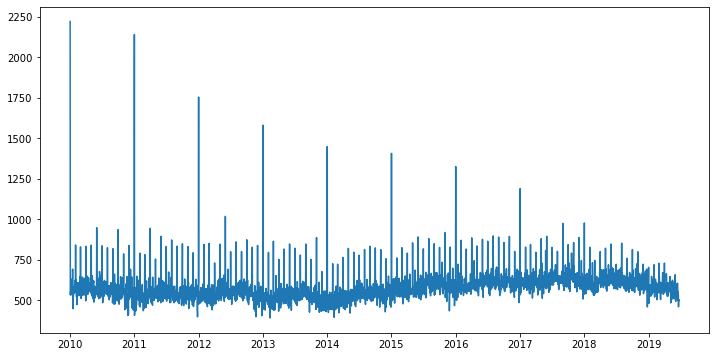

In [40]:
plt.figure(figsize=(12,6))
plt.plot(crime_series);

In [41]:
# plot_series(crime_series)

# Normalize Data

In [42]:
mean, std = crime_series.mean(), crime_series.std()

In [43]:
crime_series = (crime_series - mean) / std

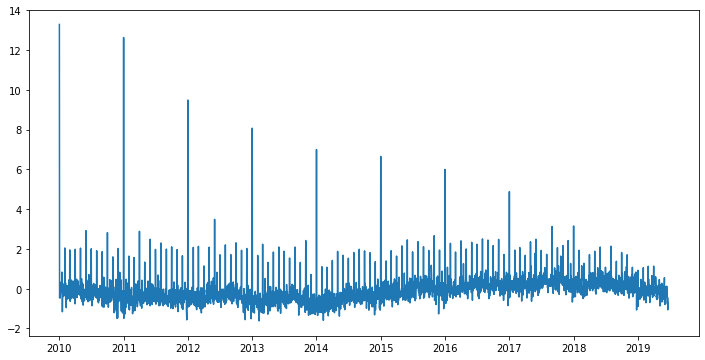

In [44]:
plt.figure(figsize=(12,6))
plt.plot(crime_series);

# Differencing

In [45]:
crime_series = crime_series.diff()

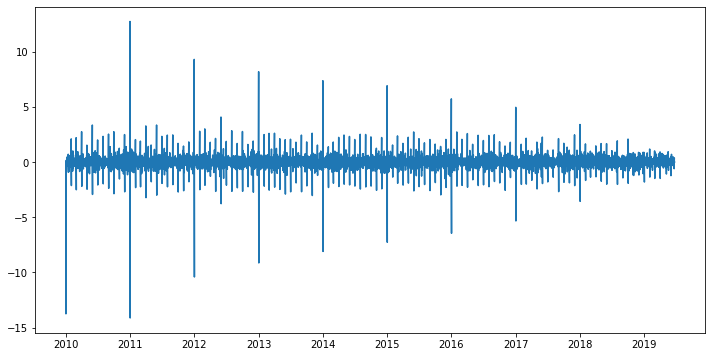

In [46]:
plt.figure(figsize=(12,6))
plt.plot(crime_series);

In [48]:
crime_series.tail()

Date Occurred
2019-06-22    0.0
2019-06-22    0.0
2019-06-22    0.0
2019-06-22    0.0
2019-06-22    0.0
Name: data_points, dtype: float64

# Reduce Volatility

In [49]:
annual_volatility = crime_series.groupby(crime_series.index.year).std()

In [50]:
annual_volatility

Date Occurred
2010    0.042944
2011    0.052487
2012    0.044328
2013    0.041359
2014    0.038123
2015    0.035153
2016    0.031709
2017    0.029022
2018    0.024092
2019    0.018811
Name: data_points, dtype: float64

# Reevaluate with Dickey Fuller Test

## EDA

Essentially the variables can be grouped to 
* When the crime occurred - given by date and time
* When the crime was reported - Date
* what was the crime - crime code and crime description
* Who was the victim - Victim sex, age and descent
* What weapon was involved - weapon code and description
* Where the crime took place - given by location, address, cross street, premise code and description

In [52]:
df.data_points['2010-01-01':'2017-12-31']

Date Occurred
2010-01-01    2222
2010-01-01    2222
2010-01-01    2222
2010-01-01    2222
2010-01-01    2222
              ... 
2017-12-31     560
2017-12-31     560
2017-12-31     560
2017-12-31     560
2017-12-31     560
Name: data_points, Length: 1667060, dtype: int64

In [55]:
df.groupby('Date Occurred').sum()

,DR Number,Time Occurred,Area ID,Reporting District,Crime Code,Victim Age,Premise Code,data_points
Date Occurred,,,,,,,,
2010-01-01,266214359557,1978540,25427,2640231,1068797,75442,963376.0,4937284
2010-01-02,54274335744,773206,6220,646607,275232,16452,160736.0,284089
2010-01-03,54703411393,744726,6411,665479,280654,16523,152894.0,290521
2010-01-04,56643083626,754482,6305,656128,277653,17820,170728.0,311364
2010-01-05,55572622072,739385,6200,644861,280775,17454,173819.0,299209
...,...,...,...,...,...,...,...,...
2019-06-18,94957003496,686390,5205,544130,245549,16057,140036.0,247009
2019-06-19,102014091880,722610,5480,572139,277788,16610,163086.0,285156
2019-06-20,87691467665,625970,4754,496257,228484,14451,128829.0,210681
